# Importing data

In [1]:
import pandas as pd

df = pd.read_csv('Electric_Vehicle_Population_Data.csv')

Sampling 5 random rows to understand the dataset:

In [2]:
df.sample(5)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
162685,KNDC3DLC4P,Pierce,South Hill,WA,98374.0,2023,KIA,EV6,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,25.0,245512886,POINT (-122.27575 47.13959),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10
98436,7SAYGDEE7N,King,Bellevue,WA,98006.0,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,41.0,186335957,POINT (-122.12096 47.55584),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
49025,1G1FZ6S02P,King,Burien,WA,98148.0,2023,CHEVROLET,BOLT EUV,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,33.0,244108168,POINT (-122.32863 47.46233),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
162435,5YJ3E1EA8J,Pierce,Tacoma,WA,98422.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,27.0,288529433,POINT (-122.37684 47.28596),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305394e+10
56589,1FTVW1EV0P,Snohomish,Edmonds,WA,98026.0,2023,FORD,F-150,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,32.0,251068394,POINT (-122.31768 47.87166),PUGET SOUND ENERGY INC,5.306105e+10


In [3]:
print(f'Number of columns and rows: {df.shape}')
df.info()

Number of columns and rows: (246137, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246137 entries, 0 to 246136
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         246137 non-null  object 
 1   County                                             246133 non-null  object 
 2   City                                               246133 non-null  object 
 3   State                                              246137 non-null  object 
 4   Postal Code                                        246133 non-null  float64
 5   Model Year                                         246137 non-null  int64  
 6   Make                                               246137 non-null  object 
 7   Model                                              246137 non-null  object 
 8   Electric Vehicle Type            

# Formatting

Since the dataset is already quite clean and well-structured, only slight formatting and deleting of unnecessary columns are needed.

First, all columns that are irrelevant to the analysis will be removed.

In [4]:
df = df.drop(columns=['Postal Code', 'Vehicle Location', 'Vehicle Location', 'Electric Utility'], axis='rows')
df.sample(3)

,VIN (1-10),County,City,State,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
212541,2C4RC1N79K,Snohomish,Edmonds,WA,2019,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,32.0,39995.0,21.0,200628942,5.306105e+10
205576,KMHC65LD0N,Snohomish,Bothell,WA,2022,HYUNDAI,IONIQ,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,29.0,0.0,1.0,276433720,5.306105e+10
107417,1C4RJXP61R,King,Kirkland,WA,2024,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,0.0,1.0,262003479,5.303302e+10


The `State` column is reformatted to display the full state names:

In [5]:
# Retrieving the list of unique state codes
df['State'].unique()

array(['WA', 'AE', 'MD', 'AL', 'CA', 'IL', 'FL', 'VA', 'KS', 'RI', 'IN',
       'TX', 'NY', 'ME', 'MA', 'GA', 'NM', 'MO', 'TN', 'CO', 'NV', 'WY',
       'NC', 'PA', 'CT', 'NE', 'HI', 'DC', 'OR', 'KY', 'ID', 'AR', 'AZ',
       'MN', 'SC', 'NJ', 'AK', 'NH', 'OH', 'WI', 'BC', 'MI', 'UT', 'LA',
       'OK', 'MS', 'NS', 'DE'], dtype=object)

In [6]:
def state_full(state_code):
    state_dict = {
        'AL': 'Alabama',
        'AK': 'Alaska',
        'AZ': 'Arizona',
        'AR': 'Arkansas',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DE': 'Delaware',
        'DC': 'District of Columbia',
        'FL': 'Florida',
        'GA': 'Georgia',
        'HI': 'Hawaii',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'ME': 'Maine',
        'MD': 'Maryland',
        'MA': 'Massachusetts',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MS': 'Mississippi',
        'MO': 'Missouri',
        'MT': 'Montana',
        'NE': 'Nebraska',
        'NV': 'Nevada',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NY': 'New York',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VT': 'Vermont',
        'VA': 'Virginia',
        'WA': 'Washington',
        'WV': 'West Virginia',
        'WI': 'Wisconsin',
        'WY': 'Wyoming',
        'AE': 'Armed Forces (Europe)',
        'BC': 'British Columbia',
        'NS': 'Nova Scotia'
    }
    return state_dict[state_code]

df['State'] = df['State'].map(state_full)

# Recheck the mapping
df['State'].unique()

array(['Washington', 'Armed Forces (Europe)', 'Maryland', 'Alabama',
       'California', 'Illinois', 'Florida', 'Virginia', 'Kansas',
       'Rhode Island', 'Indiana', 'Texas', 'New York', 'Maine',
       'Massachusetts', 'Georgia', 'New Mexico', 'Missouri', 'Tennessee',
       'Colorado', 'Nevada', 'Wyoming', 'North Carolina', 'Pennsylvania',
       'Connecticut', 'Nebraska', 'Hawaii', 'District of Columbia',
       'Oregon', 'Kentucky', 'Idaho', 'Arkansas', 'Arizona', 'Minnesota',
       'South Carolina', 'New Jersey', 'Alaska', 'New Hampshire', 'Ohio',
       'Wisconsin', 'British Columbia', 'Michigan', 'Utah', 'Louisiana',
       'Oklahoma', 'Mississippi', 'Nova Scotia', 'Delaware'], dtype=object)

With the CAFV Eligibility column, it will be replaced with another column `CAFV Eligible`, which shows 'Yes', 'No' or 'Unknown' instead of the specific reasons for easier filtering.

In [7]:
# Checking unique eligibility statustes of the column
df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].unique()

array(['Clean Alternative Fuel Vehicle Eligible',
       'Eligibility unknown as battery range has not been researched',
       'Not eligible due to low battery range'], dtype=object)

In [8]:
def cafv_category(status):
    if status == 'Clean Alternative Fuel Vehicle Eligible':
        return 'Yes'
    elif status == 'Eligibility unknown as battery range has not been researched':
        return 'Unknown'
    else:
        return 'No'

df.insert(9, 'CAFV Eligible', df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].apply(cafv_category))

# Dropping original CAFV column
df = df.drop('Clean Alternative Fuel Vehicle (CAFV) Eligibility', axis=1)

df.head(3)

,VIN (1-10),County,City,State,Model Year,Make,Model,Electric Vehicle Type,CAFV Eligible,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
0,5YJ3E1EB6K,King,Seattle,Washington,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Yes,220.0,0.0,37.0,101250425,5.303301e+10
1,5YJYGAEE5M,Yakima,Selah,Washington,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Unknown,0.0,0.0,15.0,224162858,5.307700e+10
2,5YJSA1E65N,Yakima,Granger,Washington,2022,TESLA,MODEL S,Battery Electric Vehicle (BEV),Unknown,0.0,0.0,15.0,187279214,5.307700e+10


The next step is to convert columns to their appropriate data types:

In [9]:
df['Legislative District'] = df['Legislative District'].astype('Int64')
df['2020 Census Tract'] = df['2020 Census Tract'].astype('Int64').astype('string')

The DataFrame after formatting:

In [10]:
df.sample(5)

,VIN (1-10),County,City,State,Model Year,Make,Model,Electric Vehicle Type,CAFV Eligible,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
151827,7SAYGDEE5P,King,Maple Valley,Washington,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Unknown,0.0,0.0,5,259742311,53033032010
126233,5YJ3E1EC9M,Snohomish,Lynnwood,Washington,2021,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Unknown,0.0,0.0,21,172053962,53061041816
155914,JTMABABA9R,Snohomish,Mukilteo,Washington,2024,SUBARU,SOLTERRA,Battery Electric Vehicle (BEV),Unknown,0.0,0.0,21,271746478,53061042005
14131,W1NKM8AB0S,King,Bellevue,Washington,2025,MERCEDES-BENZ,GLC-CLASS,Plug-in Hybrid Electric Vehicle (PHEV),No,1.0,0.0,41,275628825,53033024901
73602,5YJSA1E23M,Clark,Brush Prairie,Washington,2021,TESLA,MODEL S,Battery Electric Vehicle (BEV),Unknown,0.0,0.0,18,142603597,53011040603


# Analysis

## 1. Vehicle characteristics

### Top EV makers

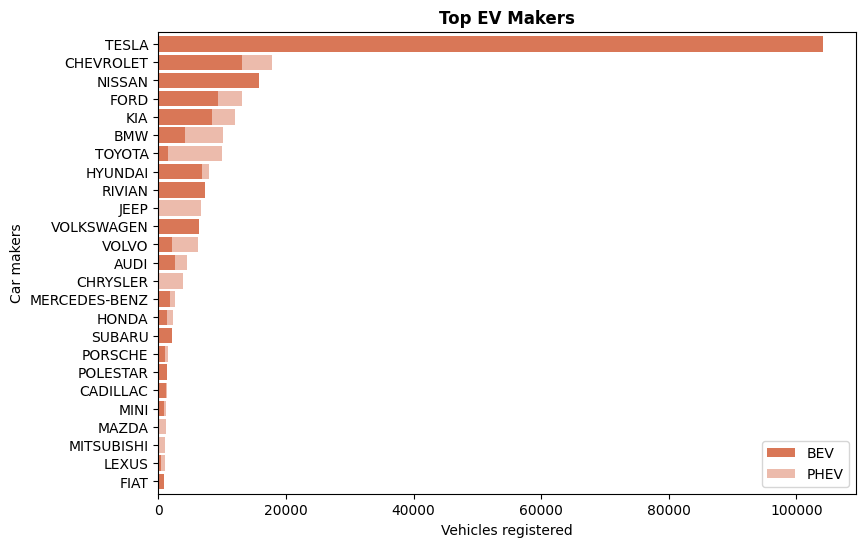

In [11]:
import matplotlib.pyplot as plt

top_makers = df['Make'].value_counts().sort_values(ascending=False).head(25)

total_BEV = df.loc[df['Electric Vehicle Type'] == 'Battery Electric Vehicle (BEV)']['Make'].value_counts()
total_PHEV = df.loc[df['Electric Vehicle Type'] == 'Plug-in Hybrid Electric Vehicle (PHEV)']['Make'].value_counts()

total = pd.DataFrame({'BEV': total_BEV, 'PHEV': total_PHEV}).fillna(0)
total['Total'] = total['BEV'] + total['PHEV']
total = total.sort_values('Total', ascending=False)
top_brands = total.head(25)

top_brands[['BEV', 'PHEV']].plot(kind='barh', stacked=True, width=0.85, color=['#D97757', '#ECBBAC'], figsize=(9, 6))

plt.title('Top EV Makers', fontweight='bold')
plt.xlabel('Vehicles registered')
plt.ylabel('Car makers')
plt.legend(loc='lower right')

plt.gca().invert_yaxis()
plt.gcf().set_dpi(100)
plt.show()

### Most registered models

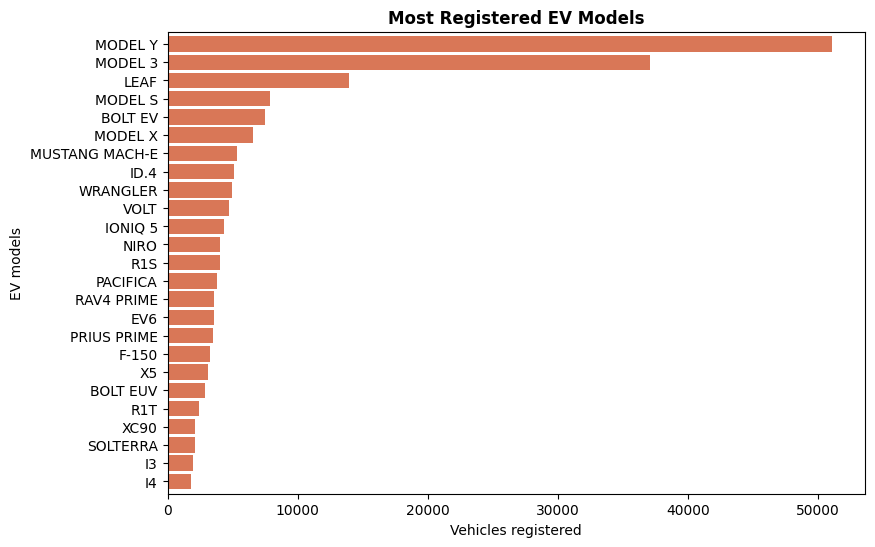

In [12]:
top_models = df['Model'].value_counts().head(25)

plt.figure(figsize=(9, 6), dpi=100)
top_models.plot(kind='barh', width=0.85, color='#D97757')
plt.title('Most Registered EV Models', fontweight='bold')
plt.xlabel('Vehicles registered')
plt.ylabel('EV models')
plt.gca().invert_yaxis()
plt.show()

### Proportion of vehicle types among registered EVs

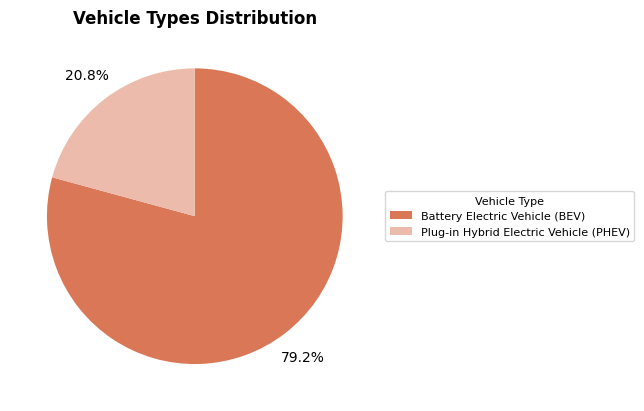

In [13]:
vehicle_type_proportion = df['Electric Vehicle Type'].value_counts().sort_values(ascending=False)

plt.figure(dpi=100)
plt.pie(
    vehicle_type_proportion,
    labels=None,
    autopct='%1.1f%%',
    pctdistance=1.2, 
    startangle=90,
    counterclock=False,
    colors=['#D97757', '#ECBBAC'])
plt.title('Vehicle Types Distribution', fontweight='bold')
plt.legend(
    vehicle_type_proportion.index,
    title='Vehicle Type',
    title_fontsize=8,
    fontsize=8,
    loc='center left',
    bbox_to_anchor=(1, 0.5)
)
plt.show()

### Range distribution between EVs and PHEVs

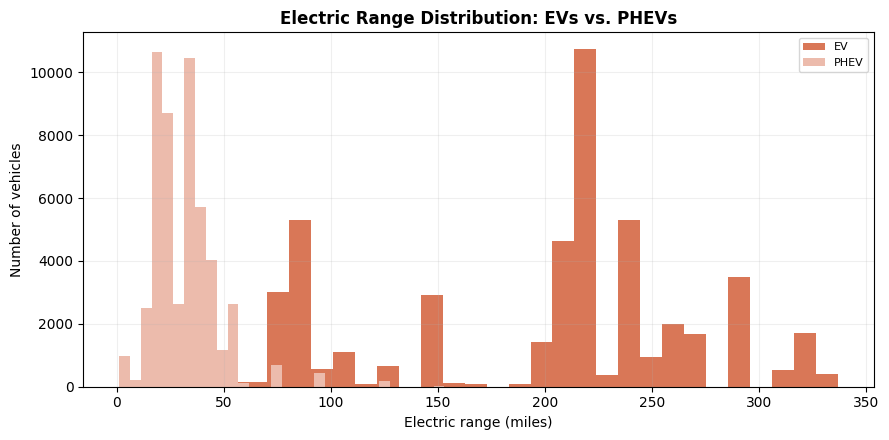

In [24]:
EV_range = df.loc[(df['Electric Vehicle Type'] == 'Battery Electric Vehicle (BEV)') & (df['Electric Range'] > 0), 'Electric Range']

PHEV_range = df.loc[(df['Electric Vehicle Type'] == 'Plug-in Hybrid Electric Vehicle (PHEV)') & (df['Electric Range'] > 0), 'Electric Range']

plt.figure(figsize=(9, 4.5), dpi=100)
plt.hist(EV_range, bins=30, alpha=1, label='EV', color='#D97757')
plt.hist(PHEV_range, bins=30, alpha=1, label='PHEV', color="#ECBBAC")

plt.title("Electric Range Distribution: EVs vs. PHEVs", fontweight='bold')
plt.xlabel("Electric range (miles)")
plt.ylabel("Number of vehicles")
plt.legend(fontsize=8)
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()

### PHEV vs. EV prices

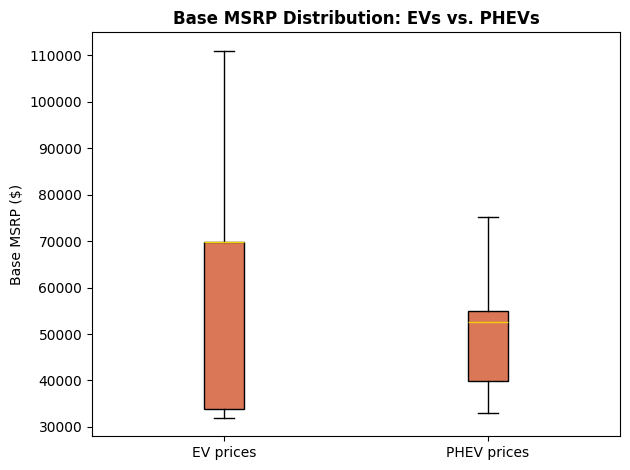

In [15]:
EV_price = df.loc[(df['Electric Vehicle Type'] == 'Battery Electric Vehicle (BEV)') & (df['Base MSRP'] > 0), 'Base MSRP']
PHEV_price = df.loc[(df['Electric Vehicle Type'] == 'Plug-in Hybrid Electric Vehicle (PHEV)') & (df['Base MSRP'] > 0), 'Base MSRP']

plt.figure(dpi=100)
bplot = plt.boxplot(
    [EV_price, PHEV_price], vert=True, 
    tick_labels=['EV prices', 'PHEV prices'], 
    showfliers=False, 
    patch_artist=True)

box_colors = ['#D97757', '#D97757']
median_line_colors = ["#f0d10c", '#f0d10c']

for patch, colors in zip(bplot['boxes'], box_colors):
    patch.set_facecolor(colors)

for patch, colors in zip(bplot['medians'], median_line_colors):
    patch.set_color(colors)

plt.title("Base MSRP Distribution: EVs vs. PHEVs", fontweight='bold')
plt.ylabel("Base MSRP ($)")
plt.tight_layout()
plt.show()

## 2. Trend analysis

### EV adoption over time

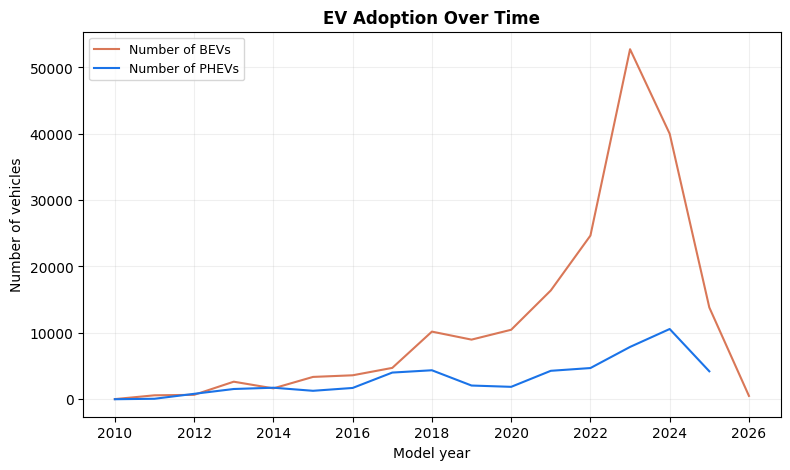

In [16]:
EVs = df.loc[(df['Electric Vehicle Type'] == 'Battery Electric Vehicle (BEV)') & (df['Model Year'] >= 2010)]
PHEVs = df.loc[df['Electric Vehicle Type'] == 'Plug-in Hybrid Electric Vehicle (PHEV)']

EV_count = EVs.groupby('Model Year')['Model Year'].value_counts()
PHEVs_count = PHEVs.groupby('Model Year')['Model Year'].value_counts()

plt.figure(figsize=(9, 5), dpi=100)
plt.plot(EV_count, label='Number of BEVs', color='#D97757')
plt.plot(PHEVs_count, label='Number of PHEVs', color='#1A73E8')

plt.title('EV Adoption Over Time', fontweight='bold')
plt.xlabel('Model year')
plt.ylabel('Number of vehicles')

plt.grid(True, alpha=0.2)
plt.legend(fontsize=9)
plt.show()

### Average range vs. average price of electric vehicles over time

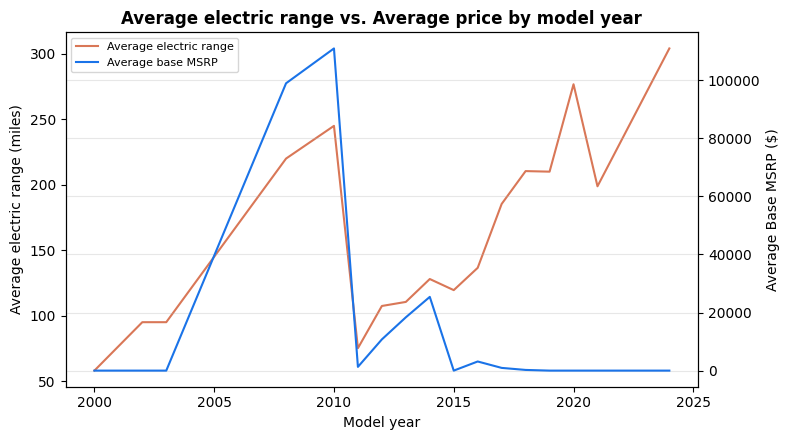

In [19]:
EVs_filtered = df.loc[(df['Electric Vehicle Type'] == 'Battery Electric Vehicle (BEV)') & (df['Electric Range'] > 0)]

average_EV_range = EVs_filtered.groupby('Model Year')['Electric Range'].mean()
average_EV_price = EVs_filtered.groupby('Model Year')['Base MSRP'].mean()

fig, axis1 = plt.subplots(figsize=(8, 4.5), dpi=100)

axis1.plot(average_EV_range, label='Average electric range', color='#D97757')
axis1.set_xlabel('Model year')
axis1.set_ylabel('Average electric range (miles)')

axis2 = axis1.twinx()
axis2.plot(average_EV_price, label='Average base MSRP', color='#1A73E8')
axis2.set_ylabel('Average Base MSRP ($)')

lines1, labels1 = axis1.get_legend_handles_labels()
lines2, labels2 = axis2.get_legend_handles_labels()
axis1.legend(lines1 + lines2, labels1 + labels2, loc='best', fontsize='8')

plt.grid(True, alpha=0.3)
plt.title('Average electric range vs. Average price by model year', fontweight='bold')
plt.tight_layout()
plt.show()

## 3. Location

### EV concentration in Washington counties

In [ ]:
import plotly.express as pltly
import json

wa_ev = df.loc[df['State'] == 'Washington']['County'].value_counts().reset_index()
wa_ev.rename(columns={'count': 'EV_count'}, inplace=True)
wa_ev

county_fips = {
    "Washington": "53000",
    "Adams": "53001",
    "Asotin": "53003",
    "Benton": "53005",
    "Chelan": "53007",
    "Clallam": "53009",
    "Clark": "53011",
    "Columbia": "53013",
    "Cowlitz": "53015",
    "Douglas": "53017",
    "Ferry": "53019",
    "Franklin": "53021",
    "Garfield": "53023",
    "Grant": "53025",
    "Grays Harbor": "53027",
    "Island": "53029",
    "Jefferson": "53031",
    "King": "53033",
    "Kitsap": "53035",
    "Kittitas": "53037",
    "Klickitat": "53039",
    "Lewis": "53041",
    "Lincoln": "53043",
    "Mason": "53045",
    "Okanogan": "53047",
    "Pacific": "53049",
    "Pend Oreille": "53051",
    "Pierce": "53053",
    "San Juan": "53055",
    "Skagit": "53057",
    "Skamania": "53059",
    "Snohomish": "53061",
    "Spokane": "53063",
    "Stevens": "53065",
    "Thurston": "53067",
    "Wahkiakum": "53069",
    "Walla Walla": "53071",
    "Whatcom": "53073",
    "Whitman": "53075",
    "Yakima": "53077"
}

wa_ev['FIPS'] = wa_ev['County'].map(county_fips)

with open('US-counties.geojson', 'r') as file:
    county_geojson = json.load(file)

fig = pltly.choropleth(
    wa_ev, 
    geojson=county_geojson,
    locations='FIPS', 
    color='EV_count', 
    scope='usa', 
    title='Washington EV Concentration by County', 
    color_continuous_scale='Oranges',
    hover_name='County',
    labels={'EV_count': 'Number of EVs'}
)

fig.update_geos(center=dict(lat=47.4, lon=-120.5), projection_scale=7)
fig.update_layout(width=960, height=540, title={'text': '<b>Washington EV Concentration</b>', 'x':0.5, 'xanchor': 'center'})
fig.show()

![Map chart](map.png)

# Conclusions